In [ ]:
# Regression Analysis
# Simple Linear Regression (SLR)
# SLR Main Calculation Flow
# 𝐻0, 𝐻𝑎 → 𝛼 → Compute Best-Fitting Line (Least Squares Method) → Compute Test Statistic (Slope & Intercept) →
    # Compute Common Error Variances (Residual Variance, Standard Error) → Compute Goodness of Fit (MSE, RMSE, MAE, R², Pearson Correlation) →
    # Compute Inference and Predictions (Point & Interval Estimations) → Perform Residual Analysis (RSS & Residual Plots) → Identify Leverage and Outliers → Decision

Intercept: 5.193378548937778
Slope: 2.4553132007706195
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     718.8
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           1.55e-30
Time:                        19:17:23   Log-Likelihood:                -100.74
No. Observations:                  50   AIC:                             205.5
Df Residuals:                      48   BIC:                             209.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

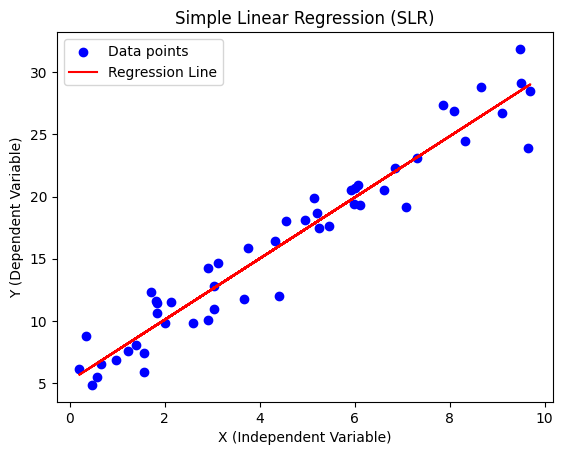

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(50) * 10  # Independent variable
true_slope = 2.5
true_intercept = 5
noise = np.random.randn(50) * 2  # Random noise
Y = true_slope * X + true_intercept + noise  # Dependent variable

# Adding intercept term for regression
X_with_intercept = sm.add_constant(X)  # Adds a column of ones for the intercept

# Perform Ordinary Least Squares (OLS) regression
model = sm.OLS(Y, X_with_intercept).fit()

# Extract coefficients
intercept, slope = model.params

# Display regression results
print("Intercept:", intercept)
print("Slope:", slope)
print(model.summary())

# Plot data points and regression line
plt.scatter(X, Y, label="Data points", color="blue")
plt.plot(X, intercept + slope * X, color="red", label="Regression Line")
plt.xlabel("X (Independent Variable)")
plt.ylabel("Y (Dependent Variable)")
plt.title("Simple Linear Regression (SLR)")
plt.legend()
plt.show()

In [3]:
# Flow 1: Parameter Estimation (Least Squares Derivation & Coefficients Interpretation)
# 𝐻0, 𝐻𝑎 → 𝛼 → Compute Least Squares Solution → Compute Slope (β₁) & Intercept (β₀) → Derive Partial Derivatives → Solve Normal Equations → Decision
# Python Code for Flow 1: Parameter Estimation (Least Squares Derivation & Coefficients Interpretation)
# Import necessary libraries
import numpy as np

def least_squares_estimation(x, y):
    """
    Computes the Least Squares Estimation for Simple Linear Regression.

    Parameters:
    x (numpy array): Independent variable
    y (numpy array): Dependent variable

    Returns:
    beta_0 (float): Intercept of the regression line
    beta_1 (float): Slope of the regression line
    """
    n = len(x)

    # Compute means
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Compute β₁ (Slope)
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    beta_1 = numerator / denominator

    # Compute β₀ (Intercept)
    beta_0 = y_mean - beta_1 * x_mean

    return beta_0, beta_1

# Example data (Referring to Main SLR Flow)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Compute regression coefficients
beta_0, beta_1 = least_squares_estimation(x, y)

# Interpret coefficients
print(f"Intercept (β₀): {beta_0}")
print(f"Slope (β₁): {beta_1}")

# Decision: Use β₀ & β₁ in Main SLR Flow for further analysis

Intercept (β₀): 2.2
Slope (β₁): 0.6


In [4]:
# Flow 2: Error Metrics & Variance Estimation
# 𝐻0, 𝐻𝑎 → 𝛼 → Compute Residual Variance → Compute Standard Errors → Compute MSE, RMSE, MAE → Compute Confidence Intervals → Decision
import numpy as np
import scipy.stats as stats

# Sample Data (Same X and Y as Main SLR Flow for consistency)
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 4, 5, 4, 5])

# Step 1: Compute Least Squares Estimates (From Main SLR Flow)
n = len(X)
X_mean = np.mean(X)
Y_mean = np.mean(Y)

# Compute β₁ (Slope) and β₀ (Intercept)
beta_1 = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean) ** 2)
beta_0 = Y_mean - beta_1 * X_mean

# Step 2: Compute Residuals
Y_pred = beta_0 + beta_1 * X
residuals = Y - Y_pred

# Step 3: Compute Residual Variance (σ²)
residual_variance = np.sum(residuals**2) / (n - 2)

# Step 4: Compute Standard Errors of β₀ and β₁
X_var = np.sum((X - X_mean) ** 2)
se_beta_1 = np.sqrt(residual_variance / X_var)
se_beta_0 = np.sqrt(residual_variance * (1/n + (X_mean**2 / X_var)))

# Step 5: Compute Error Metrics (MSE, RMSE, MAE)
MSE = np.mean(residuals**2)
RMSE = np.sqrt(MSE)
MAE = np.mean(np.abs(residuals))

# Step 6: Compute Confidence Intervals for β₀ and β₁ (95% CI)
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df=n-2)  # Two-tailed t-value

CI_beta_0 = (beta_0 - t_critical * se_beta_0, beta_0 + t_critical * se_beta_0)
CI_beta_1 = (beta_1 - t_critical * se_beta_1, beta_1 + t_critical * se_beta_1)

# Step 7: Print Results
error_metrics = {
    "Residual Variance (σ²)": residual_variance,
    "Standard Error of β₀": se_beta_0,
    "Standard Error of β₁": se_beta_1,
    "MSE": MSE,
    "RMSE": RMSE,
    "MAE": MAE,
    "95% Confidence Interval for β₀": CI_beta_0,
    "95% Confidence Interval for β₁": CI_beta_1,
}

error_metrics

{'Residual Variance (σ²)': np.float64(0.7999999999999998),
 'Standard Error of β₀': np.float64(0.9380831519646858),
 'Standard Error of β₁': np.float64(0.282842712474619),
 'MSE': np.float64(0.47999999999999987),
 'RMSE': np.float64(0.6928203230275508),
 'MAE': np.float64(0.6399999999999999),
 '95% Confidence Interval for β₀': (np.float64(-0.78539926101943),
  np.float64(5.18539926101943)),
 '95% Confidence Interval for β₁': (np.float64(-0.3001317452914304),
  np.float64(1.5001317452914305))}

In [5]:
# Flow 3: Coefficient of Determination (R²) & Limitations
# 𝐻0, 𝐻𝑎 → 𝛼 → Compute Total Sum of Squares (TSS) → Compute Residual Sum of Squares (RSS) → Compute Explained Sum of Squares (ESS) → Compute R² → Interpret R² → Compare with Adjusted R² → Decision
# Sample data (Assumed from Main SLR Flow)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 4, 6])

# Compute Mean of X and Y
x_mean = np.mean(x)
y_mean = np.mean(y)

# Compute Slope (β1) and Intercept (β0) from Flow 1
beta_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
beta_0 = y_mean - beta_1 * x_mean

# Compute Predicted Values (ŷ)
y_pred = beta_0 + beta_1 * x

# Compute Total Sum of Squares (TSS)
TSS = np.sum((y - y_mean) ** 2)

# Compute Residual Sum of Squares (RSS)
RSS = np.sum((y - y_pred) ** 2)

# Compute Explained Sum of Squares (ESS)
ESS = TSS - RSS

# Compute R² (Coefficient of Determination)
R_squared = ESS / TSS

# Compute Adjusted R²
n = len(x)  # Number of observations
p = 1  # Number of predictors in SLR
Adjusted_R_squared = 1 - ((1 - R_squared) * (n - 1) / (n - p - 1))

# Output results
print(f"TSS: {TSS:.4f}, RSS: {RSS:.4f}, ESS: {ESS:.4f}")
print(f"R²: {R_squared:.4f}, Adjusted R²: {Adjusted_R_squared:.4f}")

TSS: 10.0000, RSS: 1.9000, ESS: 8.1000
R²: 0.8100, Adjusted R²: 0.7467


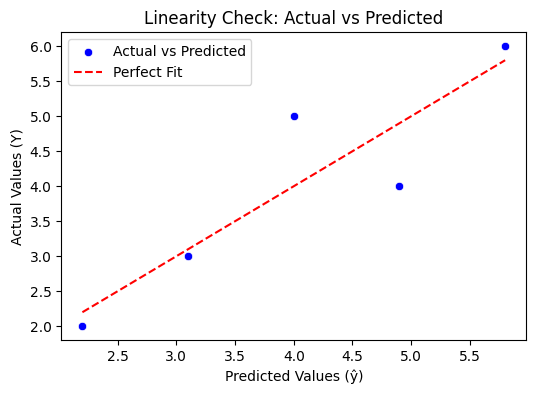

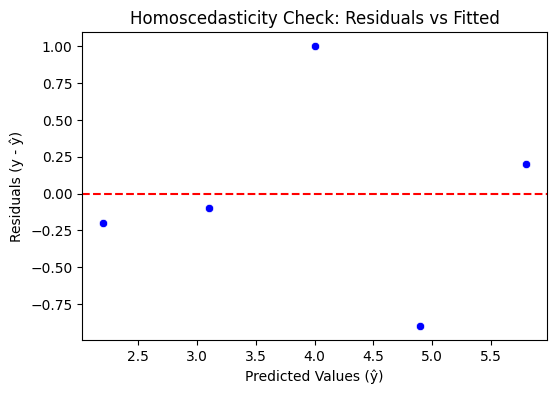

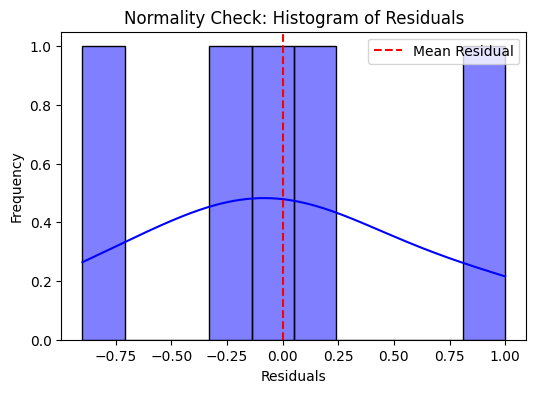

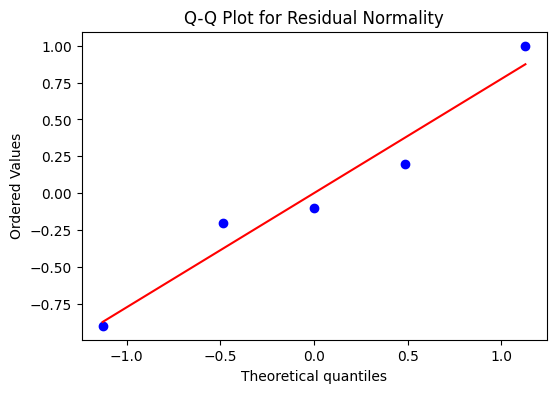

Durbin-Watson Test Statistic: 3.1789
Possible Negative Autocorrelation in Residuals


In [6]:
# Flow 4: Model Assumptions & Residual Diagnostics
# 𝐻0, 𝐻𝑎 → 𝛼 → Check Linearity → Check Homoscedasticity → Check Normality → Compute Residual Plot → Compute Durbin-Watson Test for Autocorrelation → Decision
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.stattools import durbin_watson

# Sample data (Assumed from Main SLR Flow)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 4, 6])

# Compute Mean of X and Y
x_mean = np.mean(x)
y_mean = np.mean(y)

# Compute Slope (β1) and Intercept (β0) from Flow 1
beta_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
beta_0 = y_mean - beta_1 * x_mean

# Compute Predicted Values (ŷ)
y_pred = beta_0 + beta_1 * x

# Compute Residuals
residuals = y - y_pred

# 1. Check Linearity: Scatter plot of actual vs predicted values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=y, color="blue", label="Actual vs Predicted")
plt.plot(y_pred, y_pred, color="red", linestyle="--", label="Perfect Fit")
plt.xlabel("Predicted Values (ŷ)")
plt.ylabel("Actual Values (Y)")
plt.title("Linearity Check: Actual vs Predicted")
plt.legend()
plt.show()

# 2. Check Homoscedasticity: Plot residuals vs fitted values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values (ŷ)")
plt.ylabel("Residuals (y - ŷ)")
plt.title("Homoscedasticity Check: Residuals vs Fitted")
plt.show()

# 3. Check Normality: Histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=10, color="blue")
plt.axvline(np.mean(residuals), color="red", linestyle="--", label="Mean Residual")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Normality Check: Histogram of Residuals")
plt.legend()
plt.show()

# 4. Q-Q Plot for Normality
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot for Residual Normality")
plt.show()

# 5. Compute Durbin-Watson Test for Autocorrelation
dw_statistic = durbin_watson(residuals)

# Print the Durbin-Watson statistic
print(f"Durbin-Watson Test Statistic: {dw_statistic:.4f}")

# Decision: Durbin-Watson Interpretation
if dw_statistic < 1.5:
    print("Possible Positive Autocorrelation in Residuals")
elif dw_statistic > 2.5:
    print("Possible Negative Autocorrelation in Residuals")
else:
    print("Residuals appear to be independent (No serious autocorrelation)")

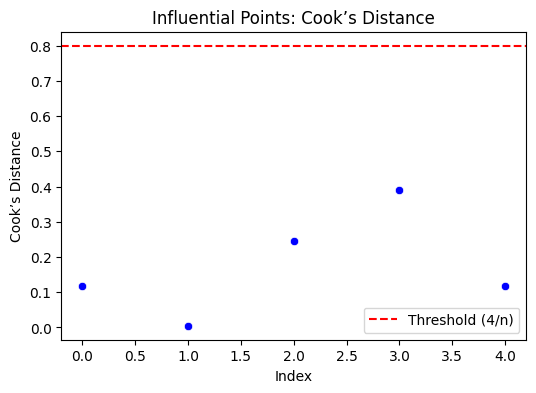

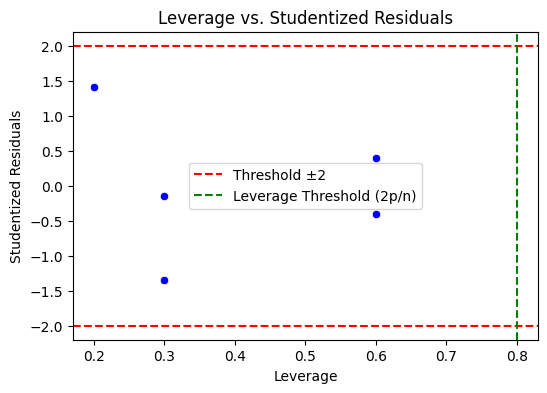

High Influence Points (Potential Outliers or Leverage Points): []


In [7]:
# Flow 5: Identifying Leverage Points & Outliers
# 𝐻0, 𝐻𝑎 → 𝛼 → Compute Leverage (Hat Matrix) → Compute Cook’s Distance → Compute DFFITS → Compute Studentized Residuals → Decision
# Sample data (Assumed from Main SLR Flow)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 4, 6])
n = len(x)  # Number of observations

# Compute Mean of X and Y
x_mean = np.mean(x)
y_mean = np.mean(y)

# Compute Slope (β1) and Intercept (β0) from Flow 1
beta_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean) ** 2)
beta_0 = y_mean - beta_1 * x_mean

# Compute Predicted Values (ŷ)
y_pred = beta_0 + beta_1 * x

# Compute Residuals
residuals = y - y_pred

# Compute Leverage (Hat Matrix Diagonal)
X = np.vstack((np.ones(n), x)).T  # Design matrix
H = X @ np.linalg.inv(X.T @ X) @ X.T  # Hat matrix
leverage = np.diag(H)

# Compute Mean Squared Error (MSE) from Flow 2
MSE = np.sum(residuals**2) / (n - 2)  # Residual variance

# Compute Cook’s Distance
cooks_distance = (residuals**2 / (2 * MSE)) * (leverage / (1 - leverage)**2)

# Compute DFFITS
dffits = residuals * np.sqrt(leverage / (1 - leverage))

# Compute Studentized Residuals
studentized_residuals = residuals / np.sqrt(MSE * (1 - leverage))

# Plot Cook’s Distance
plt.figure(figsize=(6, 4))
sns.scatterplot(x=np.arange(n), y=cooks_distance, color="blue")
plt.axhline(y=4/n, color="red", linestyle="--", label="Threshold (4/n)")
plt.xlabel("Index")
plt.ylabel("Cook’s Distance")
plt.title("Influential Points: Cook’s Distance")
plt.legend()
plt.show()

# Plot Leverage vs. Studentized Residuals
plt.figure(figsize=(6, 4))
sns.scatterplot(x=leverage, y=studentized_residuals, color="blue")
plt.axhline(y=2, color="red", linestyle="--", label="Threshold ±2")
plt.axhline(y=-2, color="red", linestyle="--")
plt.axvline(x=2 * (2 / n), color="green", linestyle="--", label="Leverage Threshold (2p/n)")
plt.xlabel("Leverage")
plt.ylabel("Studentized Residuals")
plt.title("Leverage vs. Studentized Residuals")
plt.legend()
plt.show()

# Decision: Identifying High Influence Points
high_influence_points = np.where((cooks_distance > 4/n) | (np.abs(studentized_residuals) > 2))[0]

print("High Influence Points (Potential Outliers or Leverage Points):", high_influence_points)


Performance Comparison of SLR vs. Extended Models:
SLR - MSE: 0.1208, R²: 0.9824
Log - MSE: 0.8924, R²: 0.8700
Inverse - MSE: 2.6443, R²: 0.6149
Polynomial - MSE: 0.1115, R²: 0.9838

Best Model Based on MSE: Polynomial


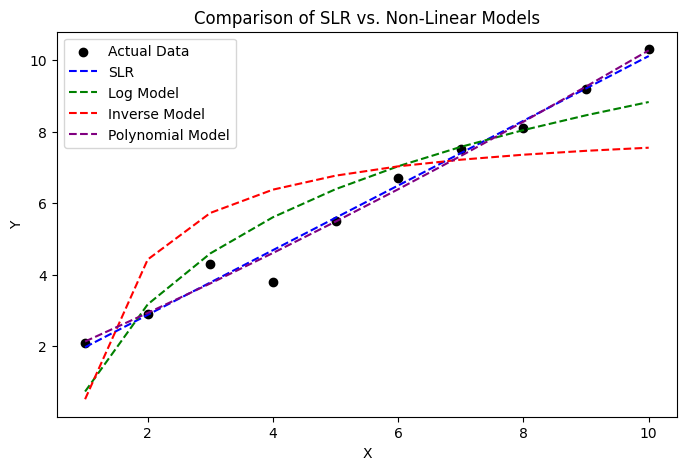

In [8]:
# Flow 6: SLR Extensions (Non-Linear & Categorical Predictors)
# 𝐻0, 𝐻𝑎 → 𝛼 → Apply Logarithmic/Polynomial/Inverse Transformations → Compute New Regression Model → Compute Predictions → Compare Performance with SLR → Decision
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample data (from Main SLR Flow)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2.1, 2.9, 4.3, 3.8, 5.5, 6.7, 7.5, 8.1, 9.2, 10.3])
n = len(x)  # Number of observations

# ========== Apply Logarithmic, Polynomial, and Inverse Transformations ==========
x_log = np.log(x)  # Logarithmic Transformation
x_inv = 1 / x      # Inverse Transformation

# Prepare polynomial features (Degree 2 for simplicity)
poly = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly.fit_transform(x.reshape(-1, 1))  # Transform x into polynomial features

# ========== Compute New Regression Models ==========

# Simple Linear Regression (Baseline for comparison)
X_slr = sm.add_constant(x)  # Add intercept
model_slr = sm.OLS(y, X_slr).fit()
y_pred_slr = model_slr.predict(X_slr)  # Predictions

# Logarithmic Model
X_log = sm.add_constant(x_log)  # Add intercept
model_log = sm.OLS(y, X_log).fit()
y_pred_log = model_log.predict(X_log)

# Inverse Model
X_inv = sm.add_constant(x_inv)  # Add intercept
model_inv = sm.OLS(y, X_inv).fit()
y_pred_inv = model_inv.predict(X_inv)

# Polynomial Regression Model (Degree 2)
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y)
y_pred_poly = poly_reg.predict(x_poly)

# ========== Compute Model Performance ==========
mse_slr = mean_squared_error(y, y_pred_slr)
r2_slr = r2_score(y, y_pred_slr)

mse_log = mean_squared_error(y, y_pred_log)
r2_log = r2_score(y, y_pred_log)

mse_inv = mean_squared_error(y, y_pred_inv)
r2_inv = r2_score(y, y_pred_inv)

mse_poly = mean_squared_error(y, y_pred_poly)
r2_poly = r2_score(y, y_pred_poly)

# ========== Compare Performance with SLR ==========
performance_table = {
    "Model": ["SLR", "Log", "Inverse", "Polynomial"],
    "MSE": [mse_slr, mse_log, mse_inv, mse_poly],
    "R²": [r2_slr, r2_log, r2_inv, r2_poly]
}

print("\nPerformance Comparison of SLR vs. Extended Models:")
for i in range(len(performance_table["Model"])):
    print(f"{performance_table['Model'][i]} - MSE: {performance_table['MSE'][i]:.4f}, R²: {performance_table['R²'][i]:.4f}")

# ========== Decision: Selecting the Best Model ==========
best_model = performance_table["Model"][np.argmin(performance_table["MSE"])]
print(f"\nBest Model Based on MSE: {best_model}")

# ========== Visualization ==========
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color="black", label="Actual Data")
plt.plot(x, y_pred_slr, color="blue", linestyle="--", label="SLR")
plt.plot(x, y_pred_log, color="green", linestyle="--", label="Log Model")
plt.plot(x, y_pred_inv, color="red", linestyle="--", label="Inverse Model")
plt.plot(x, y_pred_poly, color="purple", linestyle="--", label="Polynomial Model")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Comparison of SLR vs. Non-Linear Models")
plt.legend()
plt.show()